# # Question 1

What value is displayed when the last expression (a) is evaluated in the following code? Explain your answer by indicating what happens in every executed statement.

In [1]:
a = 0  

def b():
    global a  
    a = c(a)  

def c(a):
    return a + 2 

In [2]:
b()  
b()  
b() 
a 

6

1. When the module is imported, the variable 'a' is assigned the value 0.

2. Upon the first invocation of the function b(), it accesses and modifies the variable 'a'. It calls the function c(a) with the current value of 'a', which is 0, and assigns the return value to 'a'. The function c(a) returns 'a + 2', thus 'a' becomes 2.

3. When the function b() is called for the second time, it once again accesses and modifies the variable 'a'. It calls the function c(a) with the current value of 'a', which is 2, and assigns the return value to 'a'. The function c(a) returns 'a + 2', so 'a' becomes 4.

4. Upon the third invocation of the function b(), it accesses and modifies the variable 'a' again. It calls the function c(a) with the current value of 'a', which is 4, and assigns the return value to 'a'. The function c(a) returns 'a + 2', resulting in 'a' becoming 6.

5. When the expression 'a' is evaluated, it displays the current value of the variable 'a', which is 6.

*Note: VARIABLE 'a' is a global variable.


## Question 2

Function fileLength(), given to you, takes the name of a file as input and returns the length of the file. If the file cannot be found by the interpreter or if it cannot be read as a text file, an exception will be raised. Modify function fileLength() so that a friendly message is printed instead.

In [3]:
def file_length(file_name):
    try:
        with open(file_name) as file: # use a with statement to open and close the file
            contents = file.read() # read the file content as a string
            print(len(contents)) # print the length of the string
            
    except FileNotFoundError: # if the file is not found
        print(f'File {file_name} not found.') # print a friendly message instead of FileNotFound


In [4]:
file_length('currencies.txt')

477


In [5]:
file_length('currencies1.txt')

File currencies1.txt not found.


## Question 3

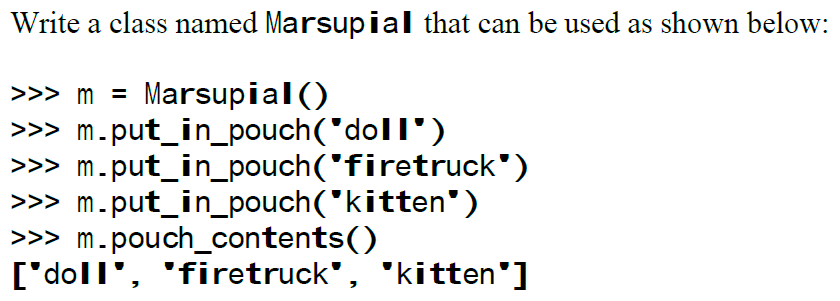

In [6]:
class Marsupial:
    def __init__(self):
        self.pouch = [] # create an empty list to store the items in the pouch

    def put_in_pouch(self, item):
        self.pouch.append(item) # add the item to the end of the list

    def pouch_contents(self):
        return self.pouch # return the list of items

In [7]:
m = Marsupial()
m.put_in_pouch('doll')
m.put_in_pouch('firetruck')
m.put_in_pouch('kitten')
m.pouch_contents()

['doll', 'firetruck', 'kitten']

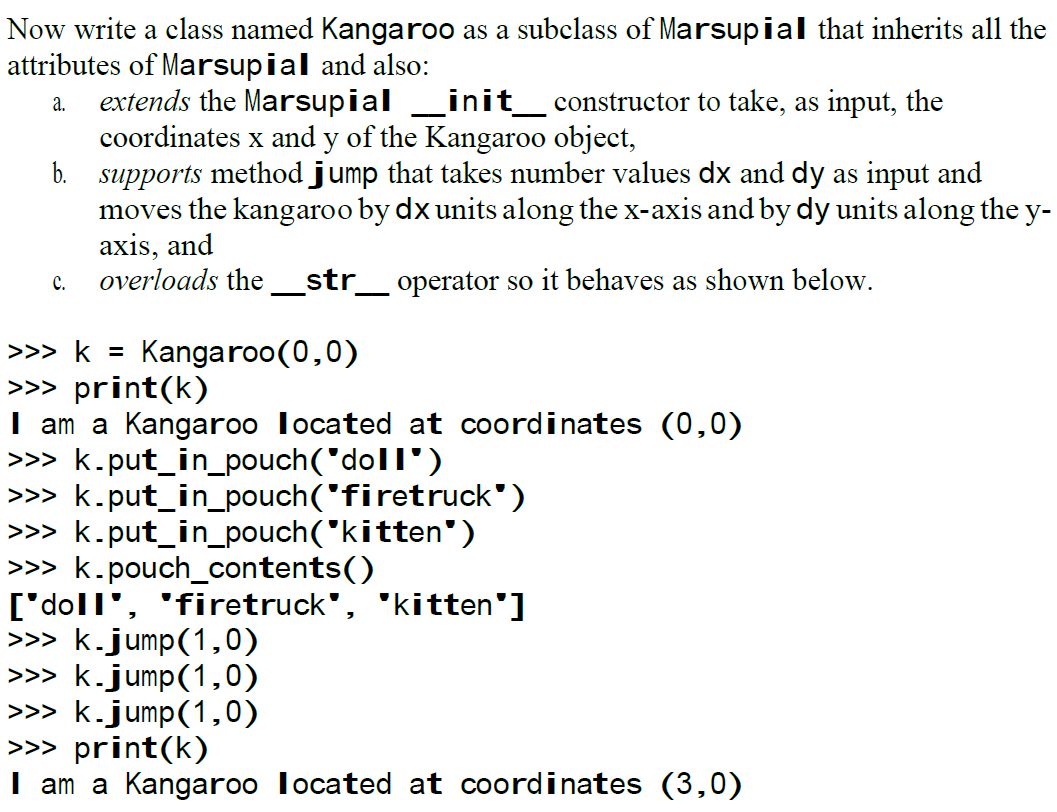

In [8]:
class Kangaroo(Marsupial): # define Kangaroo as a subclass of Marsupial
    def __init__(self, x, y):
        Marsupial.__init__(self) # call the Marsupial constructor to initialize the pouch attribute
        self.x = x # assign the x coordinate to an attribute
        self.y = y # assign the y coordinate to an attribute

    def jump(self, dx, dy):
        self.x += dx # update the x coordinate by adding dx
        self.y += dy # update the y coordinate by adding dy

    def __str__(self):
        return f'I am a Kangaroo located at coordinates ({self.x},{self.y})' # return a string representation of the object


In [9]:
k = Kangaroo(0,0)
print(k)

I am a Kangaroo located at coordinates (0,0)


In [10]:
k.put_in_pouch('doll')
k.put_in_pouch('firetruck')
k.put_in_pouch('kitten')
k.pouch_contents()

['doll', 'firetruck', 'kitten']

In [11]:
k.jump(1,0)
k.jump(1,0)
k.jump(1,0)
print(k)

I am a Kangaroo located at coordinates (3,0)


## Question 4

Write function collatz() that takes a positive integer x as input and prints the Collatz sequence starting at x. 
A Collatz sequence is obtained by repeatedly applying this rule to the previous number x in the sequence:
    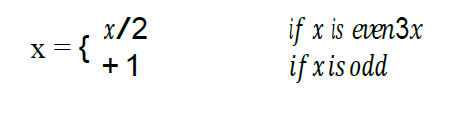
Your function should stop when the sequence gets to number 1. Your implementation must be recursive, without any loops

     
 $\gt$$\gt$$\gt$collatz(1)
<br>1
     
$\gt$$\gt$$\gt$collatz(10)
<br>10
<br>5
<br>16
<br>8
<br>4
<br>2
<br>1

In [12]:
def collatz(x):
    print(x) # print the current value of x
    if x == 1: # base case: if x is 1, stop the recursion
        return
    elif x % 2 == 0: # recursive case: if x is even, divide it by 2 and call collatz again
        collatz(x // 2)
    else: # recursive case: if x is odd, multiply it by 3 and add 1 and call collatz again
        collatz(3 * x + 1)

In [13]:
collatz(1)

1


In [14]:
collatz(10)

10
5
16
8
4
2
1


## Question 5

Write a recursive method binary() that takes a non-negative integer n and prints the binary representation of integer n.

$\gt$$\gt$$\gt$ binary(0) 
<br>0

$\gt$$\gt$$\gt$ binary(1) 
<br>1

$\gt$$\gt$$\gt$ binary(3) 
<br>11

$\gt$$\gt$$\gt$ binary(9) 
<br>1001

In [15]:
def binary(n):
    if n > 1:
        binary(n // 2) # Recursive call with integer division by 2
    print(n % 2, end="") # print the remainder (0 or 1) without a newline

In [16]:
binary(0)

0

In [17]:
binary(1)

1

In [18]:
binary(3)

11

In [19]:
binary(9)

1001

## Question 6

Implement a class named HeadingParser that can be used to parse an HTML document, and retrieve and print all the headings in the document. You should implement your class as a subclass of HTMLParser, defined in Standard Library module html.parser. When fed a string containing HTML code, your class should print the headings, one per line and in the order in which they appear in the 
document. Each heading should be indented as follows: an h1 heading should have indentation 0, and h2 heading should have indentation 1, etc. Test your implementation using w3c.html.

$\gt$$\gt$$\gt$infile = open('w3c.html')

$\gt$$\gt$$\gt$content = infile.read()

$\gt$$\gt$$\gt$infile.close()

$\gt$$\gt$$\gt$hp = HeadingParser()

$\gt$$\gt$$\gt$hp.feed(content)

W3C Mission
<br> &nbsp; Principles

In [20]:
from html.parser import HTMLParser

class HeadingParser(HTMLParser):
    def __init__(self):
        super().__init__()
        self.headings = []  # Store headings and their levels
        self.indentations = [0]  # List to manage indentation levels

    def handle_starttag(self, tag, attrs):
        if tag.startswith('h') and len(tag) == 2:  # Check if it's a heading tag h1, h2, etc.
            last_indentation = self.indentations[-1]
            self.headings.append((tag, last_indentation))  # Append the tag and the last indentation level

    def handle_endtag(self, tag):
        if tag.startswith('h') and len(tag) == 2:
            last_indentation = self.headings[-1][1] if self.headings else 0
            self.indentations.append(last_indentation + 1)  # Add 1 indentation for subsequent headings

    def handle_data(self, data):
        if data.strip() and self.headings:  # Output headings and their indentation
            tag, indentation = self.headings.pop(0)
            print(" " * indentation + data)



In [21]:
infile = open('w3c.html') # open the file w3c.html
content = infile.read() # read the file content as a string
infile.close() # close the file
hp = HeadingParser() # create a HeadingParser object
hp.feed(content) # feed the content to the parser

W3C Mission
 Principles


## Question 7

Implement recursive function webdir() that takes as input: a URL (as a string) and non-negative integers depth and indent. Your function should visit every web page reachable from the starting URL web page in depth clicks or less, and print each web page's URL. As shown below, indentation, specified by indent, should be used to indicate the depth of a URL.

$\gt$$\gt$$\gt$

webdir('http://reed.cs.depaul.edu/lperkovic/csc242/test1.html', 2, 0)

http://reed.cs.depaul.edu/lperkovic/csc242/test1.html

http://reed.cs.depaul.edu/lperkovic/csc242/test2.html

http://reed.cs.depaul.edu/lperkovic/csc242/test4.html

http://reed.cs.depaul.edu/lperkovic/csc242/test3.html

http://reed.cs.depaul.edu/lperkovic/csc242/test4.html

In [22]:
import urllib.request # import the module for requesting URLs
import re # import the module for regular expressions

def webdir(url, depth, indent):
    print(' ' * indent + url) # print the current URL with the appropriate indentation
    if depth == 0: # base case: if depth is 0, stop the recursion
        return
    else: # recursive case: if depth is positive, visit the links on the current page
        try:
            response = urllib.request.urlopen(url) # try to open the URL
            html = response.read().decode() # read the HTML content as a string
            response.close() # close the response object
            links = re.findall('href="(.*?)"', html) # find all the links on the page using a regular expression
            for link in links: # loop through each link
                if link.startswith('http'): # check if the link is a valid URL
                    webdir(link, depth - 1, indent + 1) # call webdir again with the link, reduced depth, and increased indent
        except: # if an error occurs while opening or reading the URL
            print(' ' * indent + 'Error: could not open or read ' + url) # print an error message with the appropriate indentation


In [23]:
webdir('http://web.simmons.edu/~grovesd/comm244/notes/week3/html-test-page.html',2,0)

http://web.simmons.edu/~grovesd/comm244/notes/week3/html-test-page.html
 http://web.simmons.edu/~grovesd/comm244
  https://use.fontawesome.com/releases/v5.3.1/css/all.css
  http://web.simmons.edu/~grovesd/comm244/css/base.css
  http://web.simmons.edu/~grovesd/comm244/
  http://web.simmons.edu/~grovesd/comm244/week1
  http://web.simmons.edu/~grovesd/comm244/week2
  http://web.simmons.edu/~grovesd/comm244/week3
  http://web.simmons.edu/~grovesd/comm244/week4
  http://web.simmons.edu/~grovesd/comm244/week5
  http://web.simmons.edu/~grovesd/comm244/week6
  http://web.simmons.edu/~grovesd/comm244/week7
  http://web.simmons.edu/~grovesd/comm244/week8
  http://web.simmons.edu/~grovesd/comm244/week9
  http://web.simmons.edu/~grovesd/comm244/week10
  http://web.simmons.edu/~grovesd/comm244/week11
  http://web.simmons.edu/~grovesd/comm244/week12
  http://web.simmons.edu/~grovesd/comm244/week13
  http://web.simmons.edu/~grovesd/comm244/recipebook
  http://web.simmons.edu/~grovesd/comm244/story
  

In [24]:
webdir('http://reed.cs.depaul.edu/lperkovic/csc242/test1.html', 2, 0)

http://reed.cs.depaul.edu/lperkovic/csc242/test1.html
Error: could not open or read http://reed.cs.depaul.edu/lperkovic/csc242/test1.html


* NOTE- For the URL provided in the question, the origin server did not find a current representation for the target resource, so i used http://web.simmons.edu/~grovesd/comm244/notes/week3/html-test-page.html (provided by you in announcements tab in blackboard) to test the program.

## Question 8

Write SQL queries on the below database table that return:
<br>a) All the temperature data.
<br>b) All the cities, but without repetition.
<br>c) All the records for India.
<br>d) All the Fall records.
<br>e) The city, country, and season for which the average rainfall is between 200 and 400 millimeters.
<br>f) The city and country for which the average Fall temperature is above 20 degrees, in increasing temperature order.
<br>g) The total annual rainfall for Cairo.
<br>h) The total rainfall for each season.

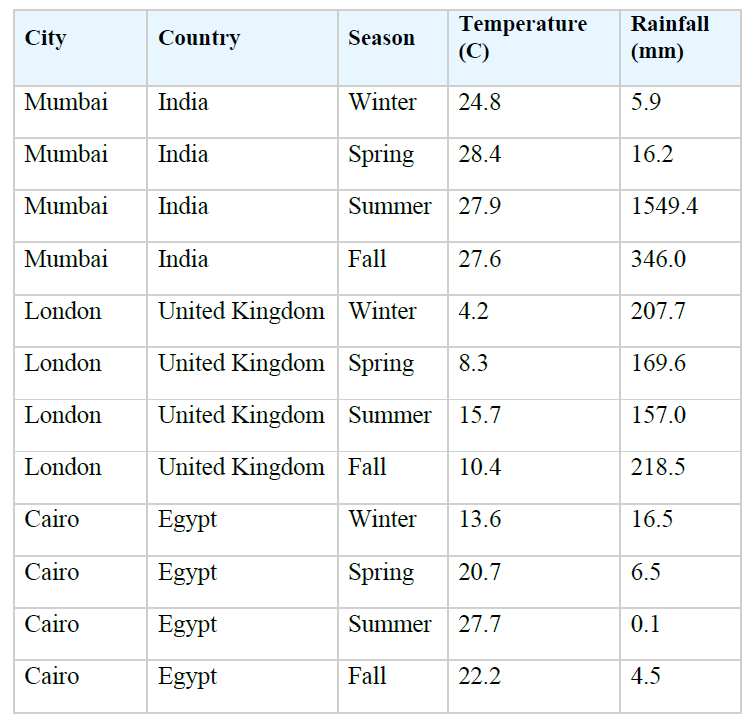

## a) All the temperature data.

SELECT "Temperature (C)" FROM weatherdata;

* Note - I have used PostgresSql for this question. Created the given table, with name weatherdata.


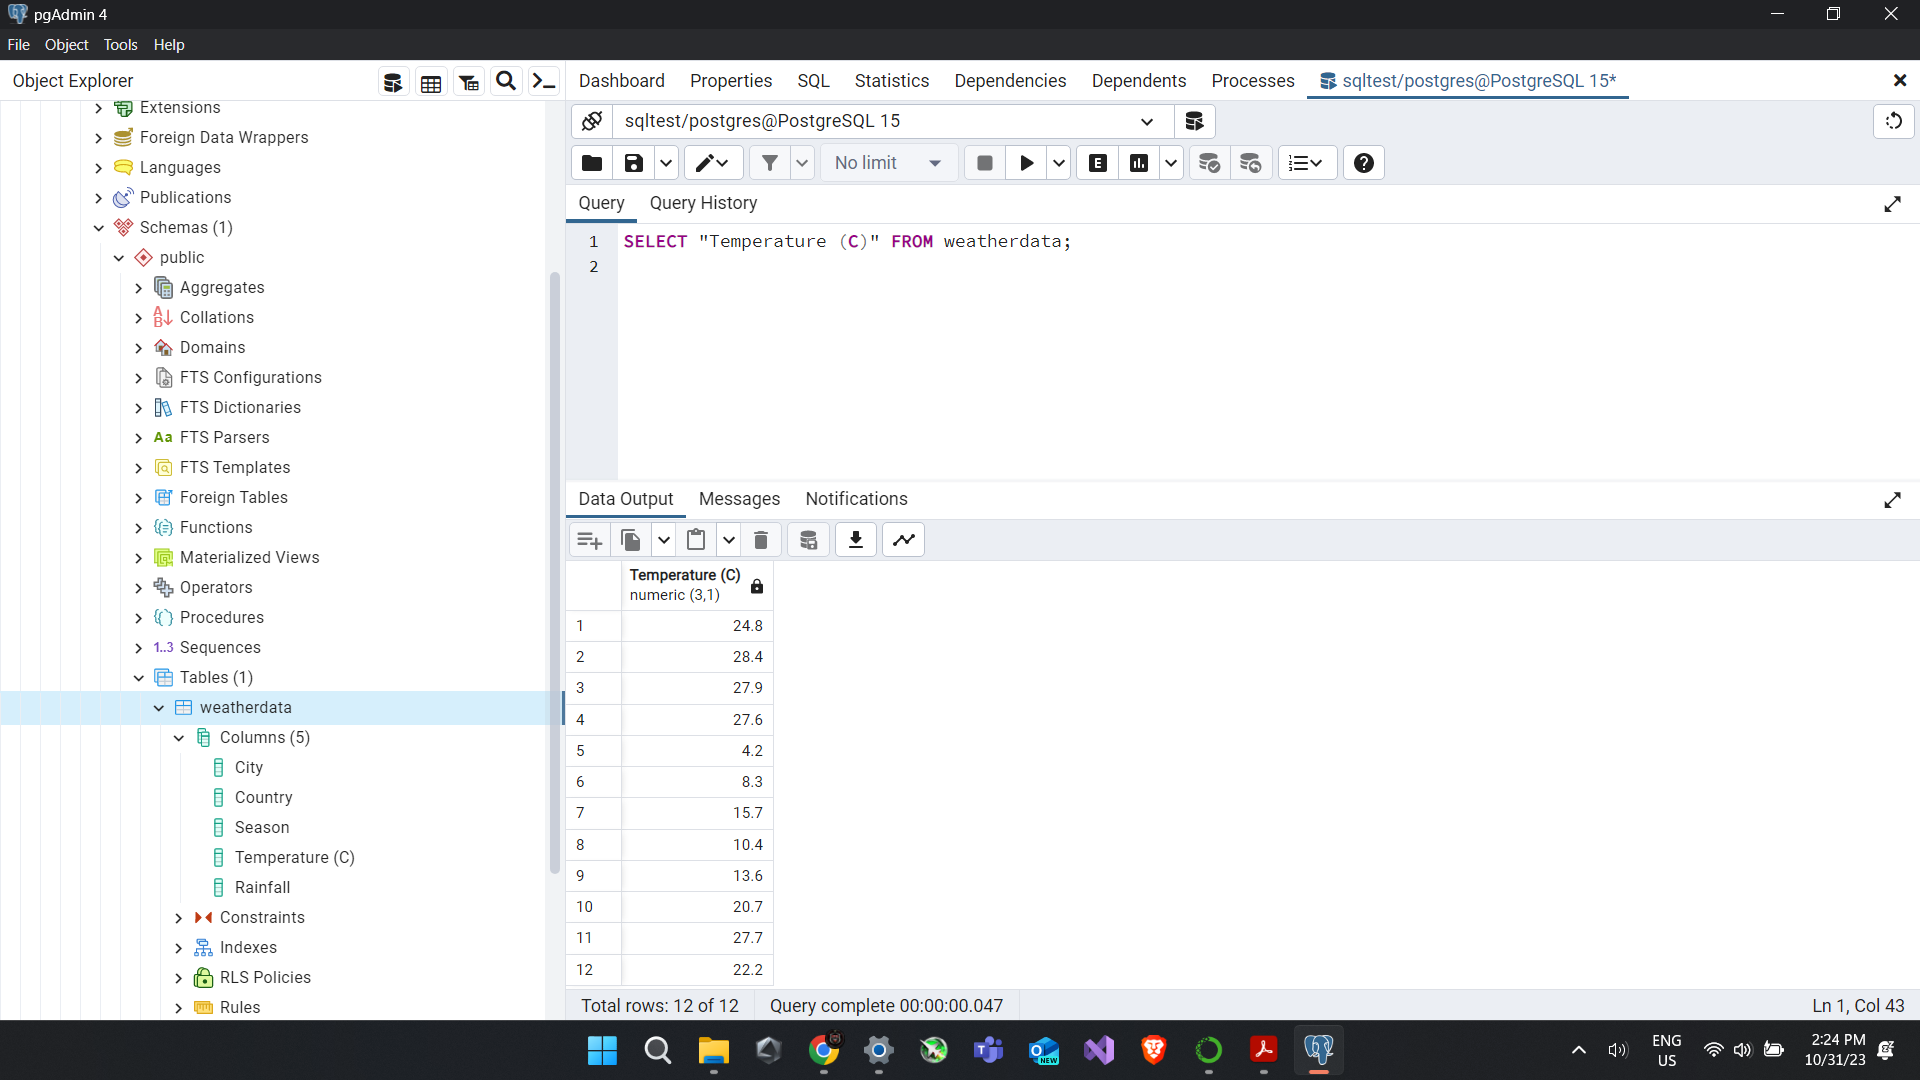

* Note- 

SELECT Temperature (C) FROM weatherdata; 

will give an error since the first alphabet of Temperature is in upper case, so using double quotes is mandatory.

## b) All the cities, but without repetition.

SELECT DISTINCT "City" FROM weatherdata;

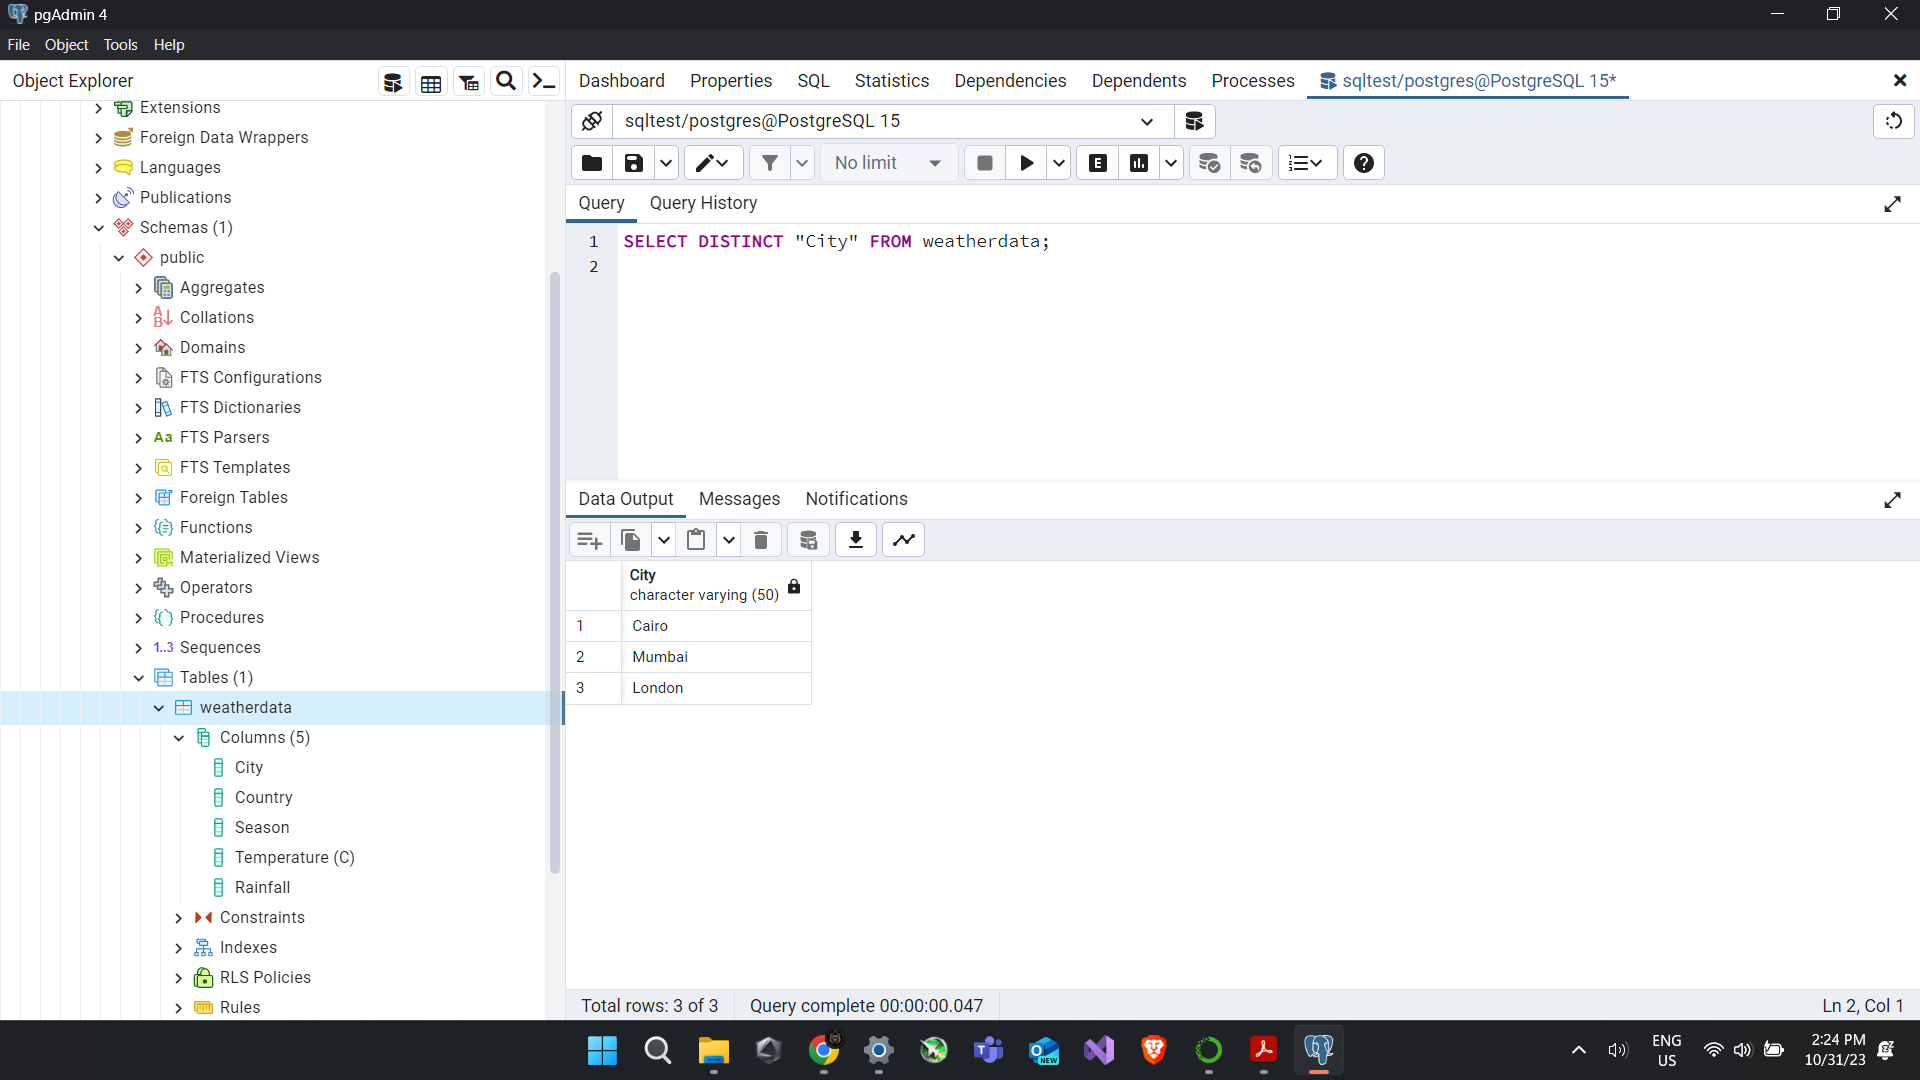

## c) All the records for India.

SELECT * FROM weatherdata

WHERE "Country" = 'India';

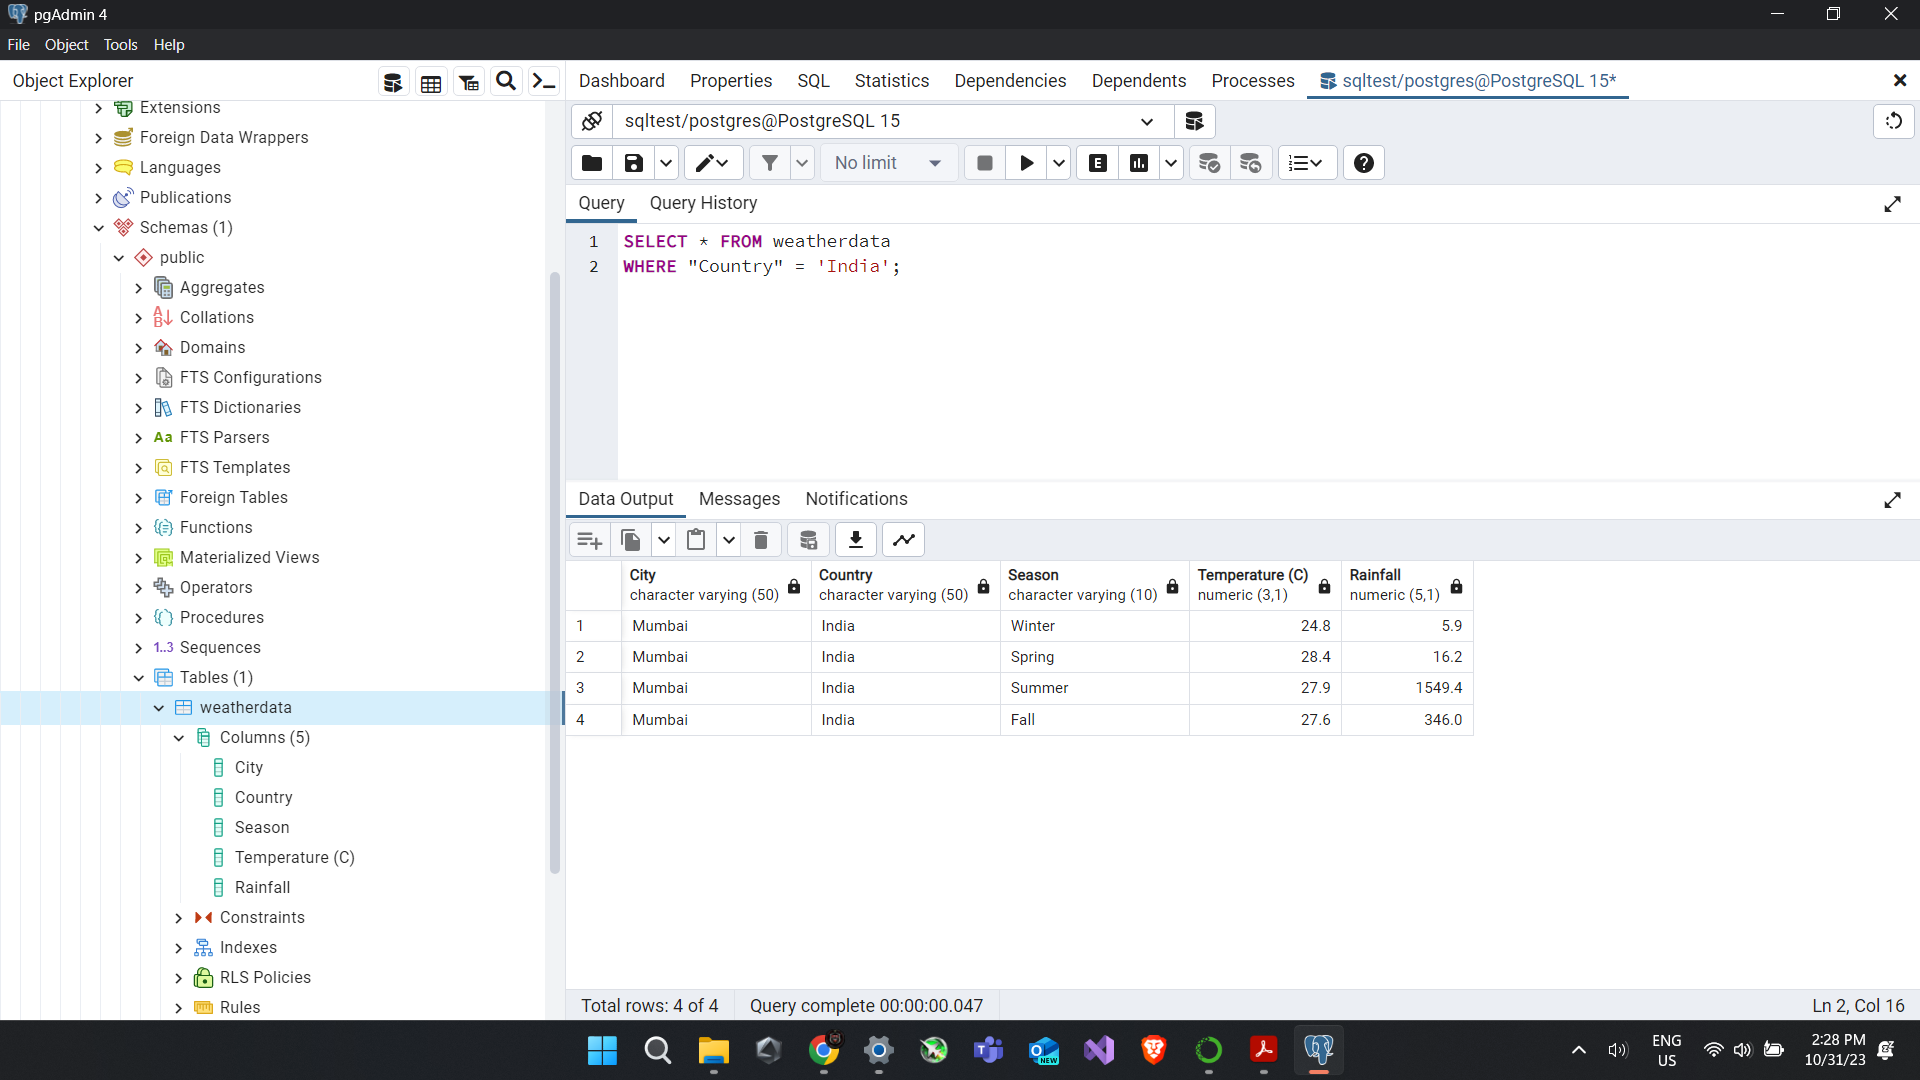

## d) All the Fall records.

SELECT * FROM weatherdata

WHERE "Season" = 'Fall';

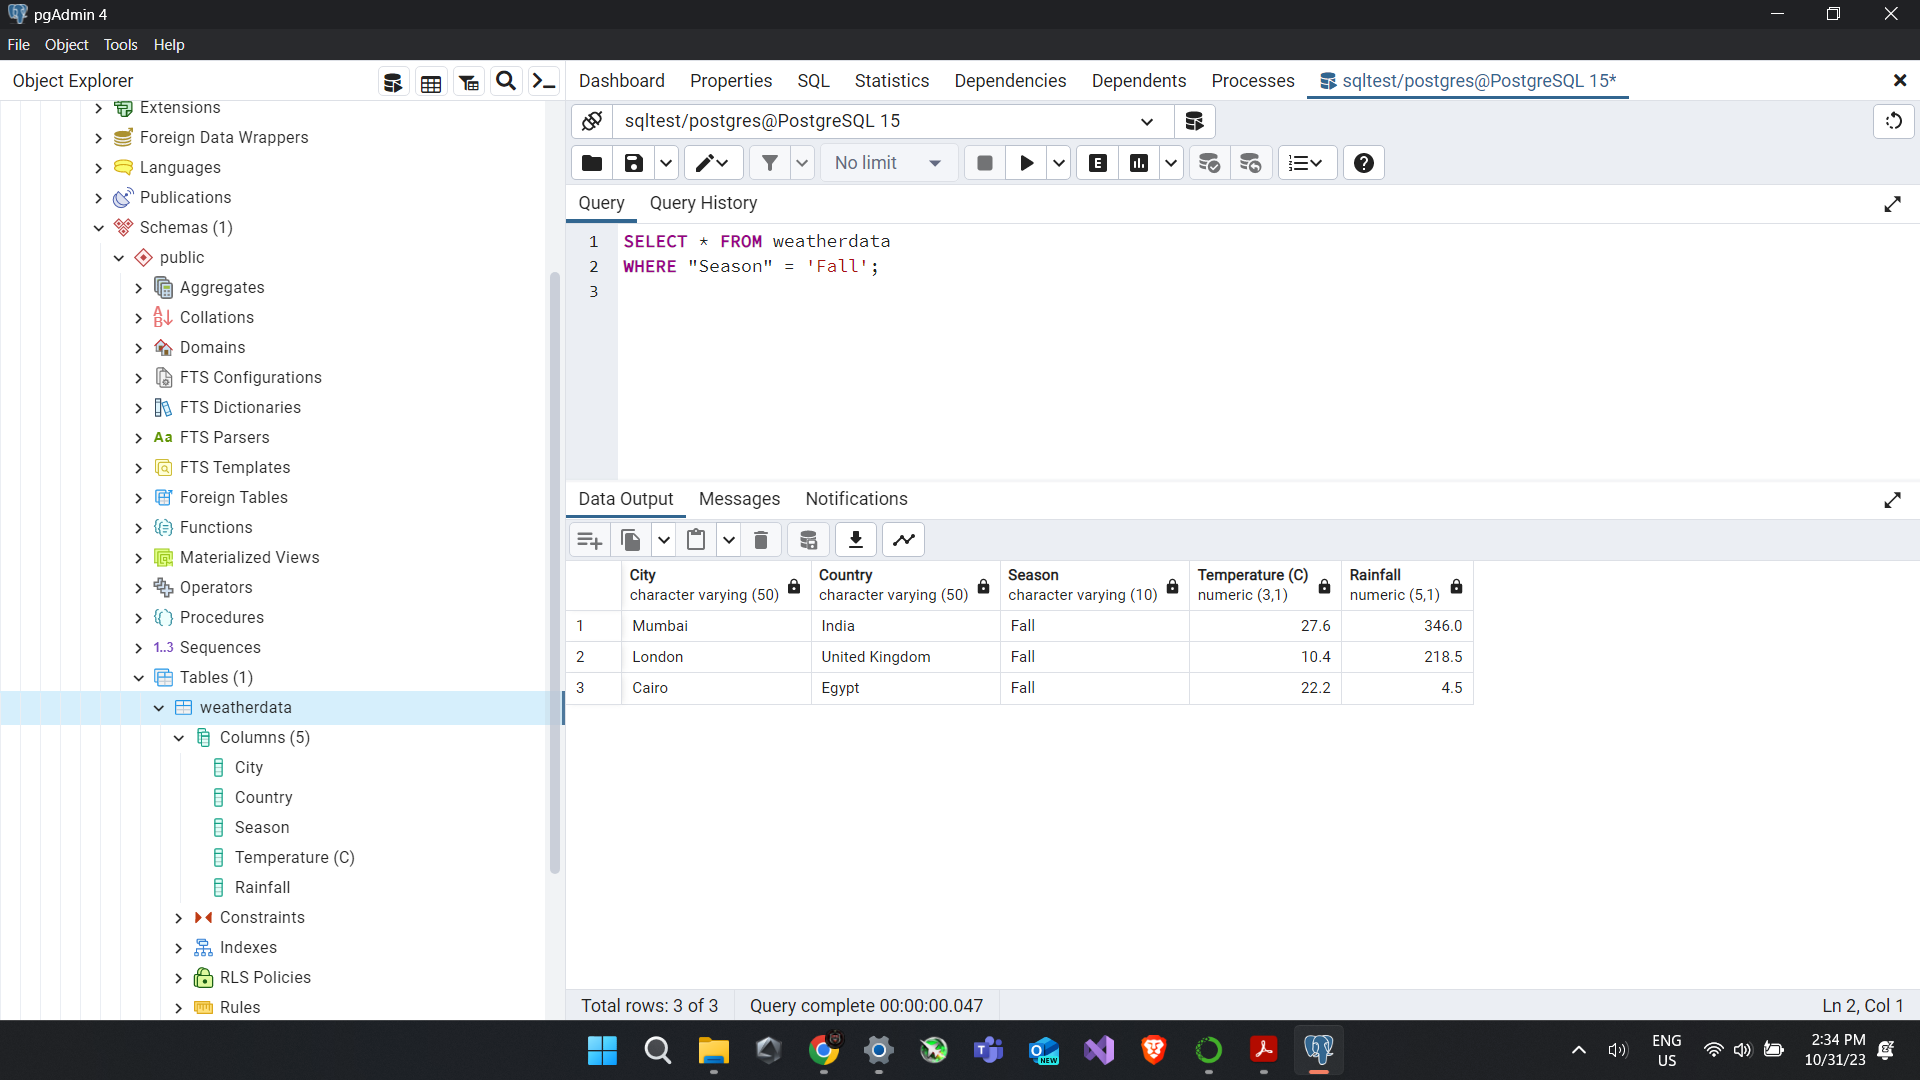

## e) The city, country, and season for which the average rainfall is between 200 and 400 millimeters.


SELECT "City", "Country", "Season" FROM weatherdata 

WHERE "Rainfall" BETWEEN 200 AND 400;

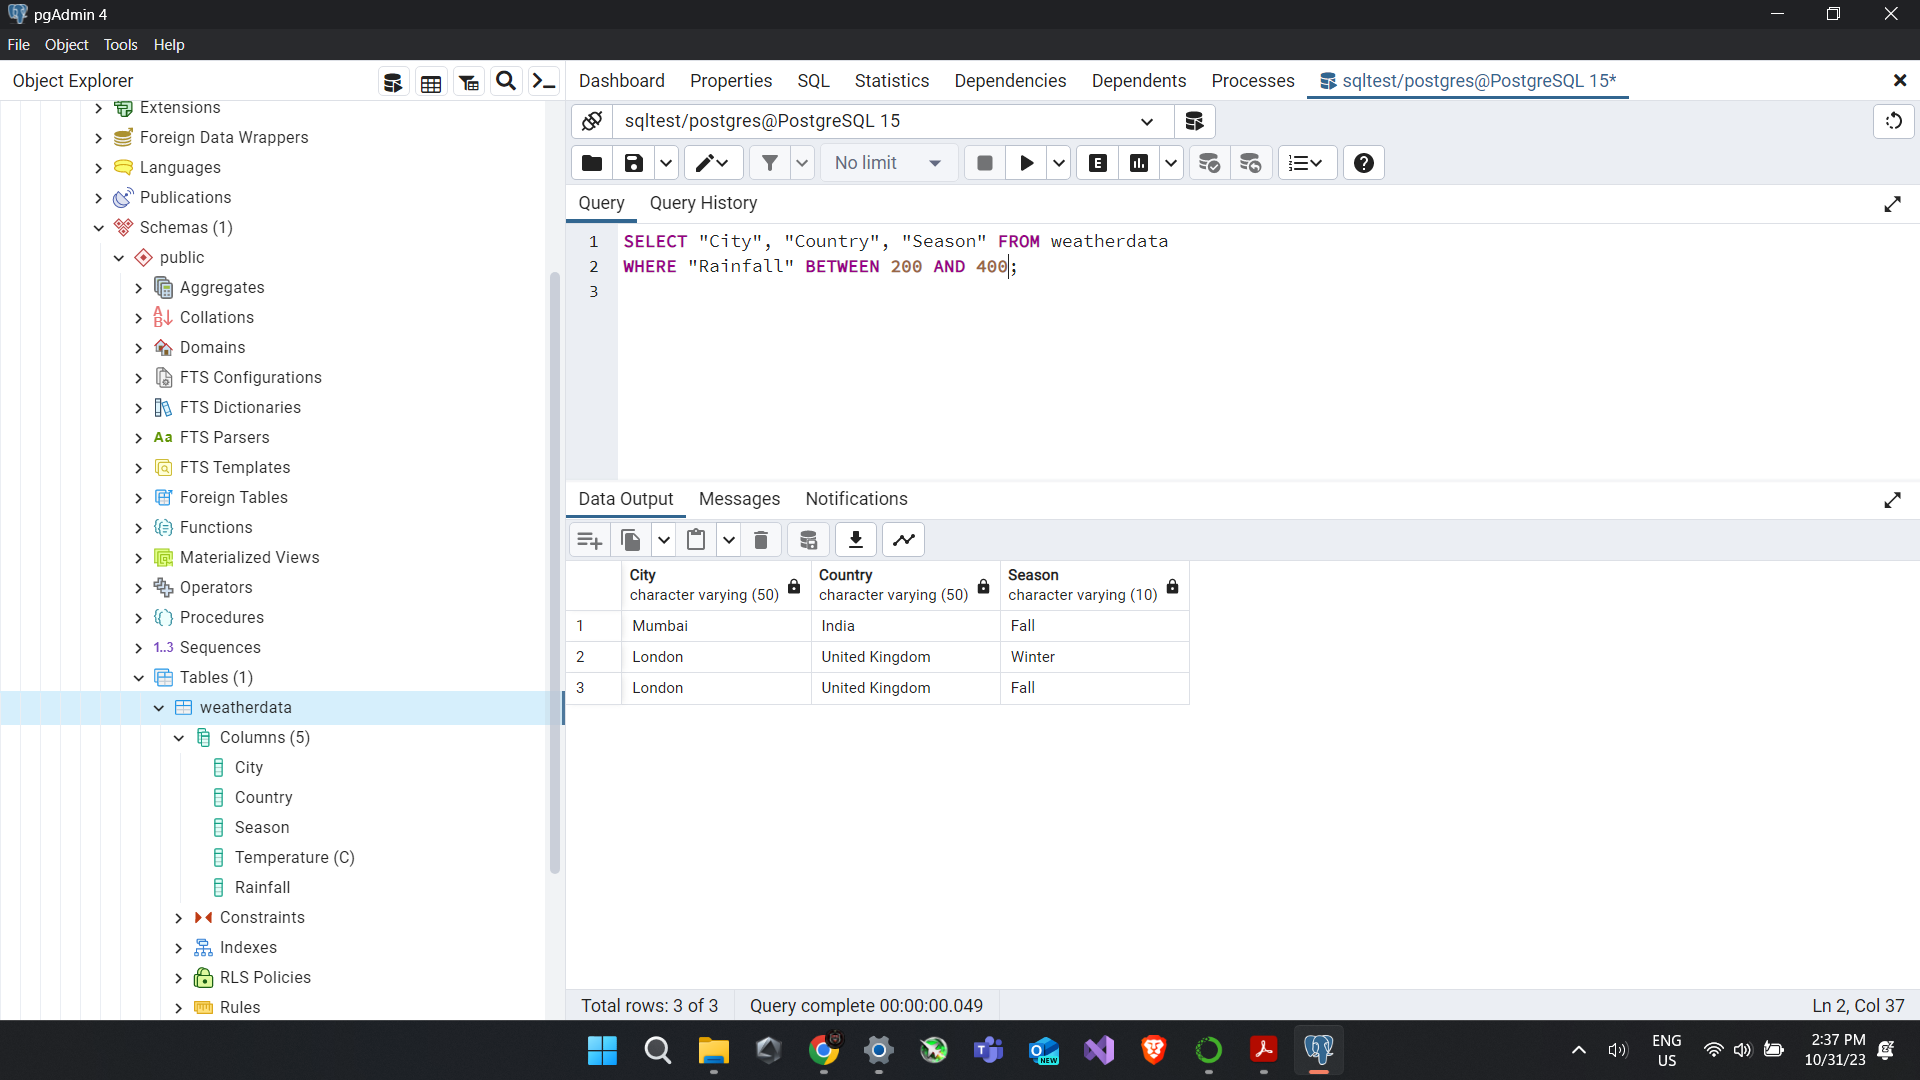

## f) The city and country for which the average Fall temperature is above 20 degrees, in increasing temperature order.

SELECT "City", "Country" FROM weatherdata

WHERE "Season" ='Fall' AND "Temperature (C)"> 20 ORDER BY "Temperature (C)" ASC;

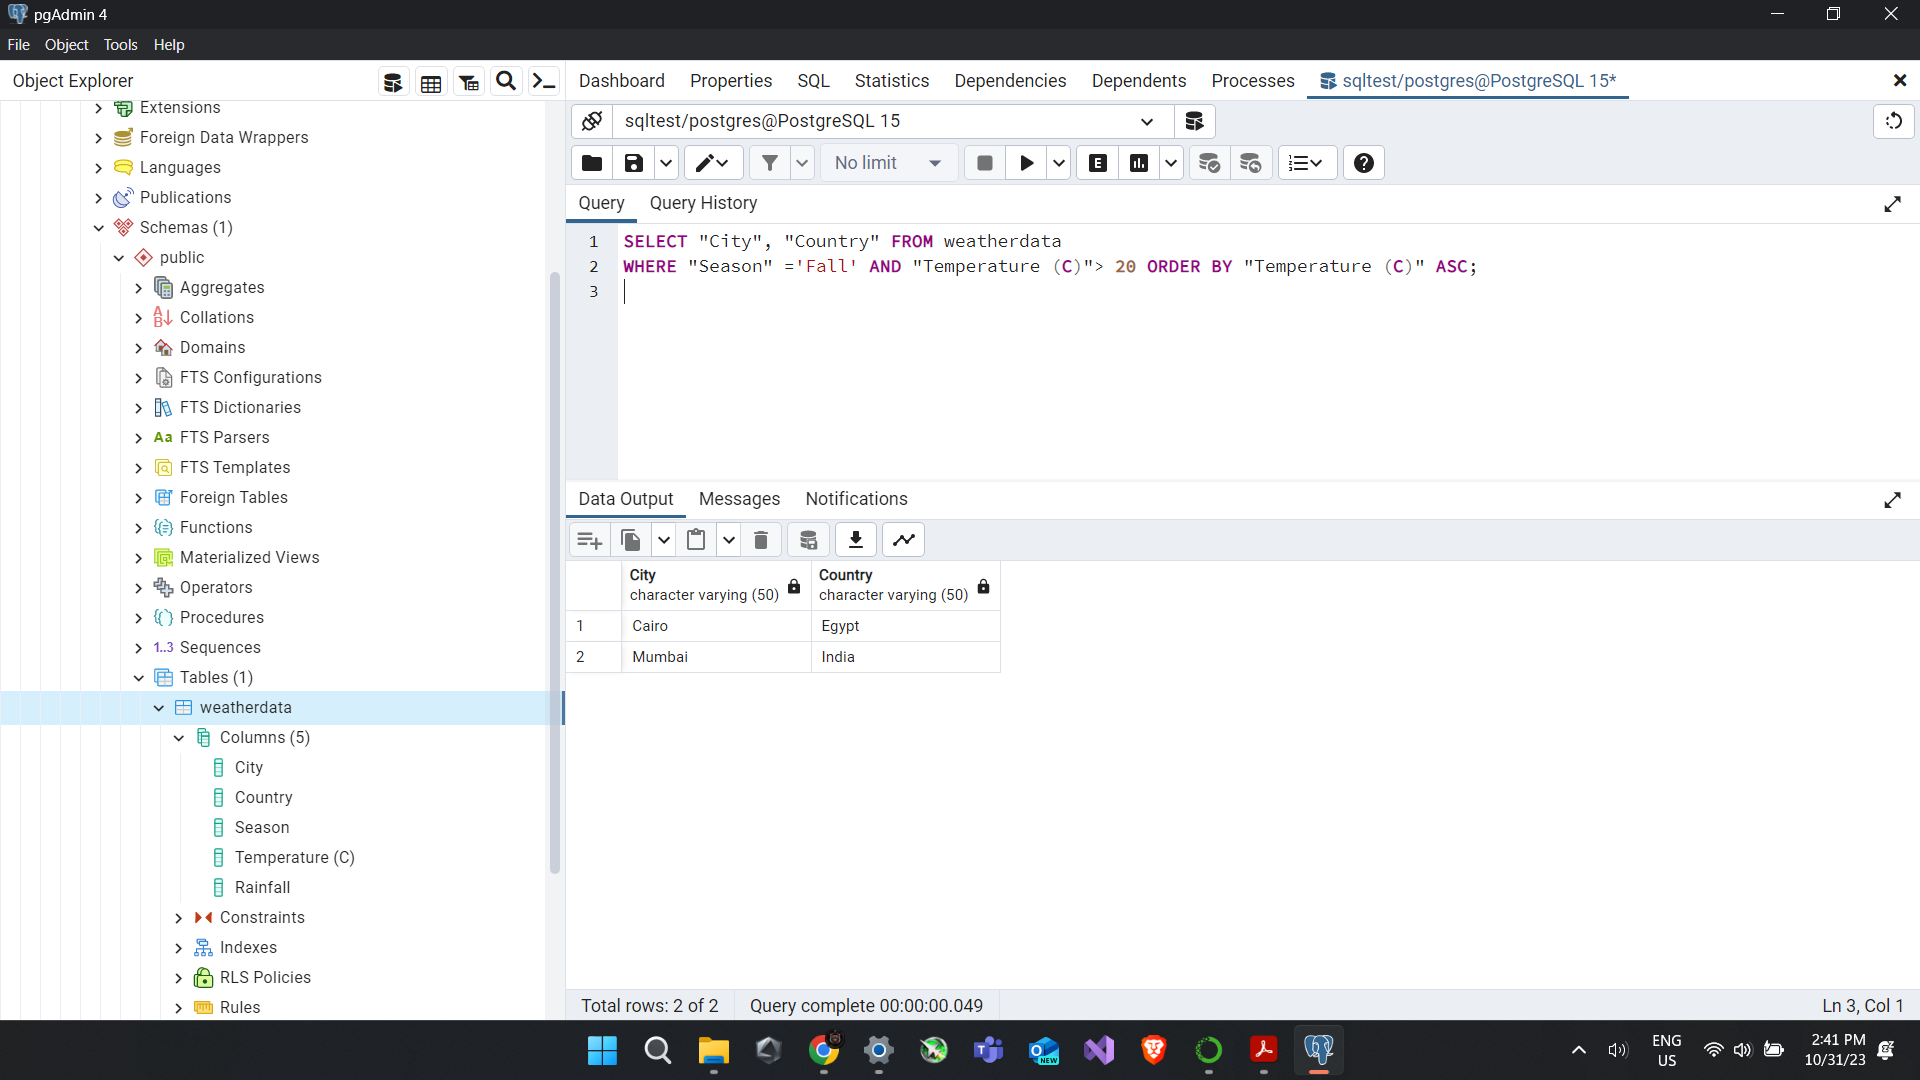

## g) The total annual rainfall for Cairo.


SELECT SUM("Rainfall") FROM weatherdata

WHERE "City" ='Cairo';

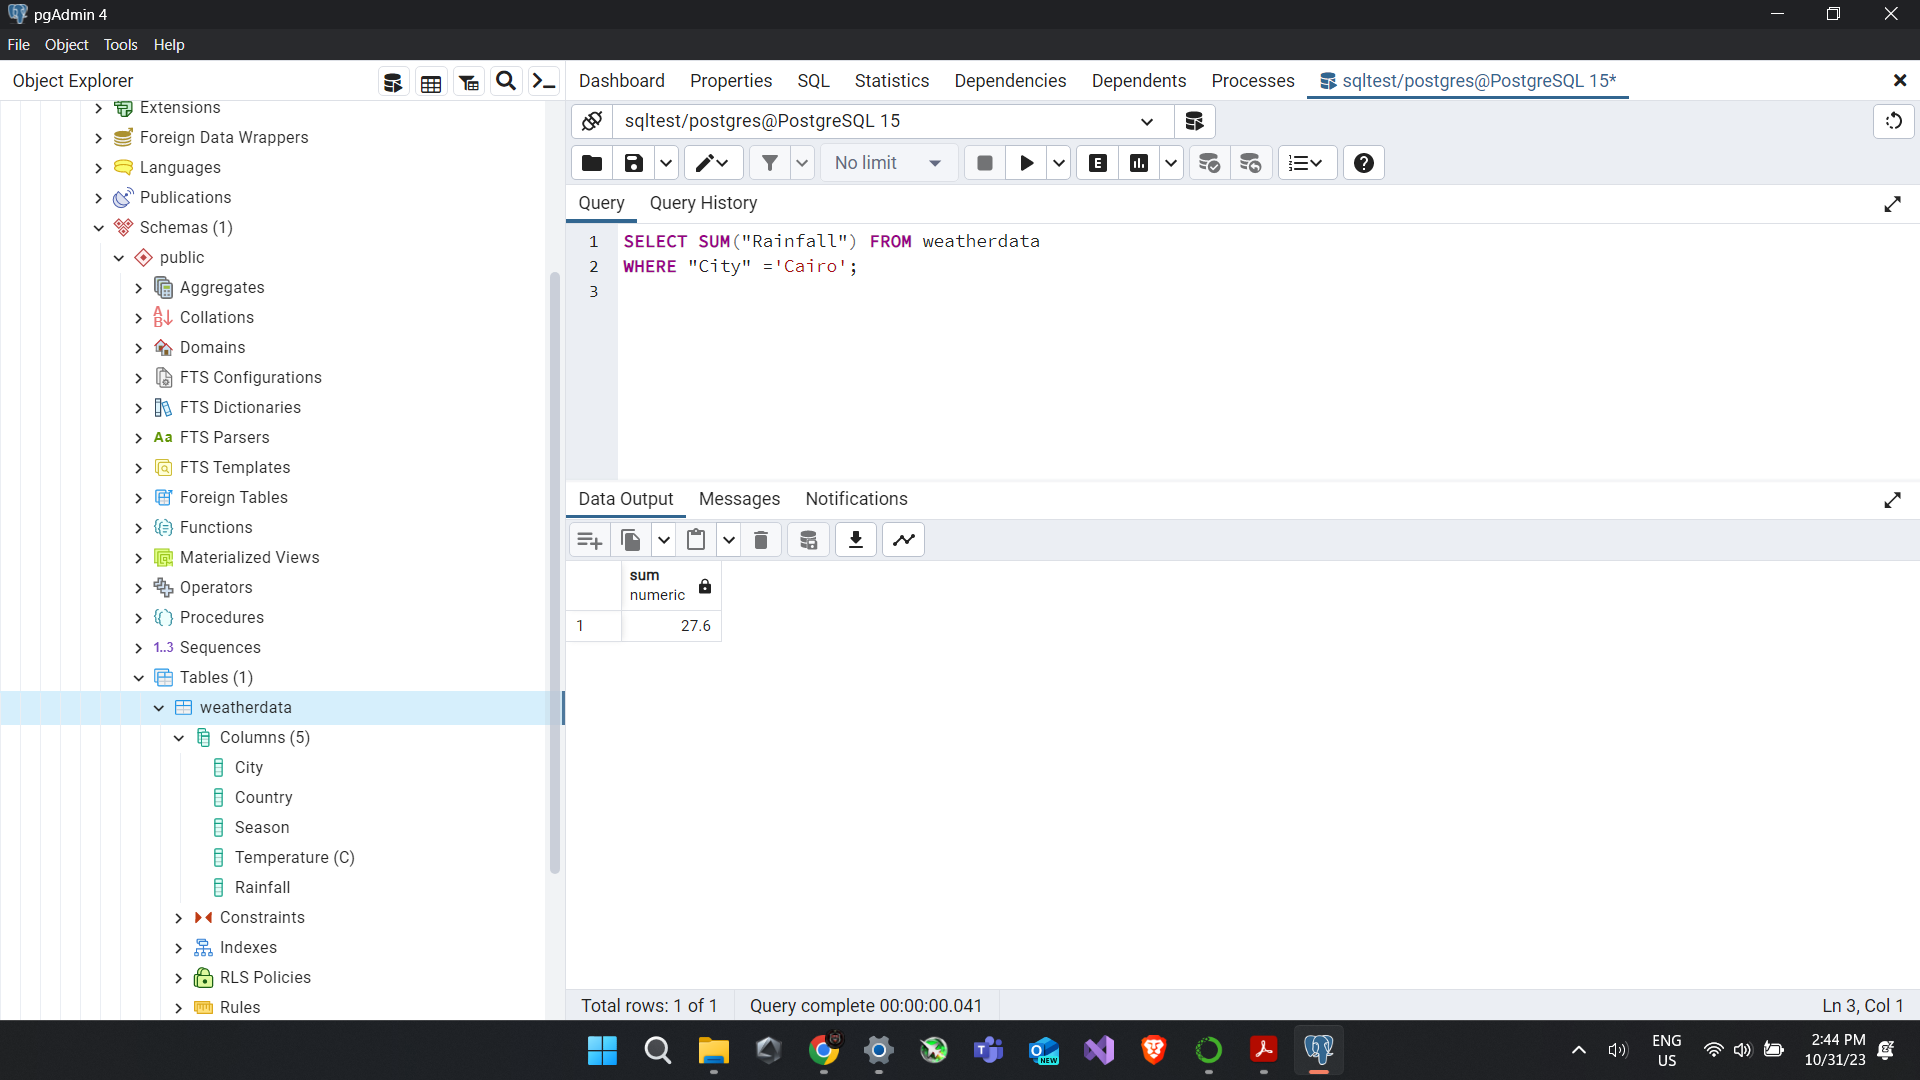

## h) The total rainfall for each season.

SELECT "Season", SUM("Rainfall") FROM weatherdata

GROUP BY "Season";

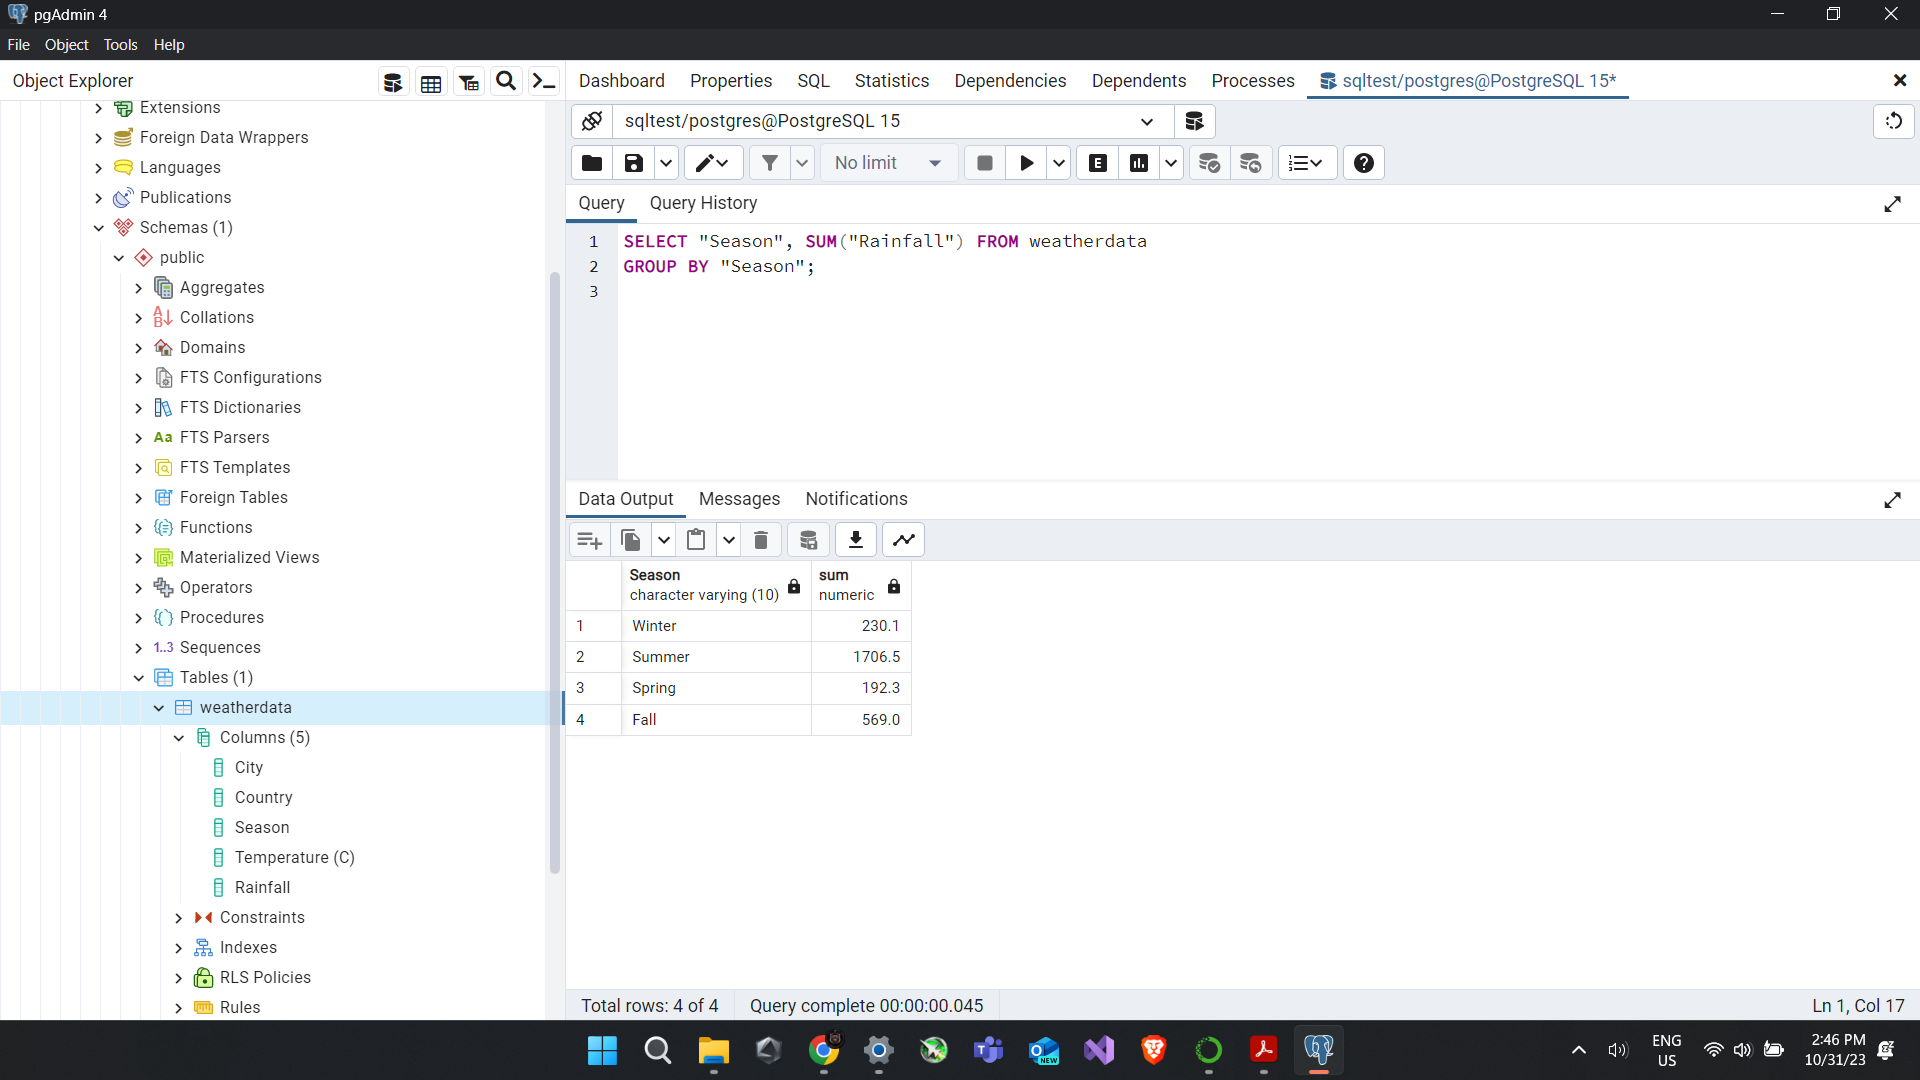

## Question 9

Suppose list words is defined as follows:

$\gt$$\gt$$\gt$words = ['The', 'quick', 'brown', 'fox', 'jumps', 'over','the', 'lazy', 'dog']

Write list comprehension expressions that use list words and generate the following lists:

a) ['THE', 'QUICK', 'BROWN', 'FOX', 'JUMPS', 'OVER', 'THE', 'LAZY', 'DOG']

b) ['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']

c) [3, 5, 5, 3, 5, 4, 3, 4, 3] (the list of lengths of words in list words).

d) [['THE', 'the', 3], ['QUICK', 'quick', 5], ['BROWN', 'brown', 5], ['FOX', 'fox', 3], ['JUMPS', 'jumps', 5], ['OVER', 'over', 4], ['THE', 'the', 3], ['LAZY', 'lazy', 4], ['DOG', 'dog', 3]] (the list containing a list for every word of list words, where each list contains the word in uppercase and lowercase and the length of the word.)

e) ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog'] (the list of words in list words containing 4 or more characters.)

In [25]:
# Original list of words
words = ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']

# a) Convert all words to uppercase
upper_words = [word.upper() for word in words]
print("Uppercase Words", upper_words)

Uppercase Words ['THE', 'QUICK', 'BROWN', 'FOX', 'JUMPS', 'OVER', 'THE', 'LAZY', 'DOG']


In [26]:
# b) Convert all words to lowercase
lower_words = [word.lower() for word in words]
print("Lowercase Words", lower_words)

Lowercase Words ['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']


In [27]:
# c) List of lengths of words
word_lengths = [len(word) for word in words]
print("Word Lengths:", word_lengths)

Word Lengths: [3, 5, 5, 3, 5, 4, 3, 4, 3]


In [28]:
# d) List containing word, lowercase word, and length for each word
word_info = [[word.upper(), word.lower(), len(word)] for word in words]
print("", word_info)

 [['THE', 'the', 3], ['QUICK', 'quick', 5], ['BROWN', 'brown', 5], ['FOX', 'fox', 3], ['JUMPS', 'jumps', 5], ['OVER', 'over', 4], ['THE', 'the', 3], ['LAZY', 'lazy', 4], ['DOG', 'dog', 3]]


In [29]:
# e) List of words containing 4 or more characters
long_words = [word for word in words if len(word) >= 4]
print("Words with 4 or more characters:", long_words)

Words with 4 or more characters: ['quick', 'brown', 'jumps', 'over', 'lazy']
